California_housing 데이터셋으로 아래사항을 참조하여 주택가격을 예측하는 회귀모델을 개발하세요.
- 전체 회귀모델을 적용
- 각 모델별 최적 하이퍼파라미터 - GridSearchCV 활용
- 평가지수 MSE 기준으로 가장 성능이 좋은 모델과 파라미터를 적용하여 평가 결과를 출력

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state=42)

pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('svd',TruncatedSVD(n_components=2)),
    ('logreg',LogisticRegression(max_iter=1000))
])

param_grid = {
    'svd__n_components':[2,5,10],
    'logreg__C': [0.1,1.0,10.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(
"Best parameters found: ", grid_search.best_params_
)

def evaluate_model(model, X_test, y_test):
    y_pred = grid_search.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test, y_pred)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    print(f"Test Accuracy ; {accuracy:.4f}")
    print('\nClassification Report :')
    print(report)
    print(f"Test ROC AUC : {roc_auc:.4f}")

evaluate_model(grid_search,X_test,y_test)

Best parameters found:  {'logreg__C': 1.0, 'svd__n_components': 10}
Test Accuracy ; 0.9825

Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Test ROC AUC : 0.9977


In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
# 1. 데이터 로드
housing = fetch_california_housing()

X = housing.data
y = housing.target
df = pd.DataFrame(X, columns=housing.feature_names)

# 타겟값 포함한 데이터프레임 생성
df['Target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# 2. 데이터 전처리
# 1) 결측치 확인
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Target,0


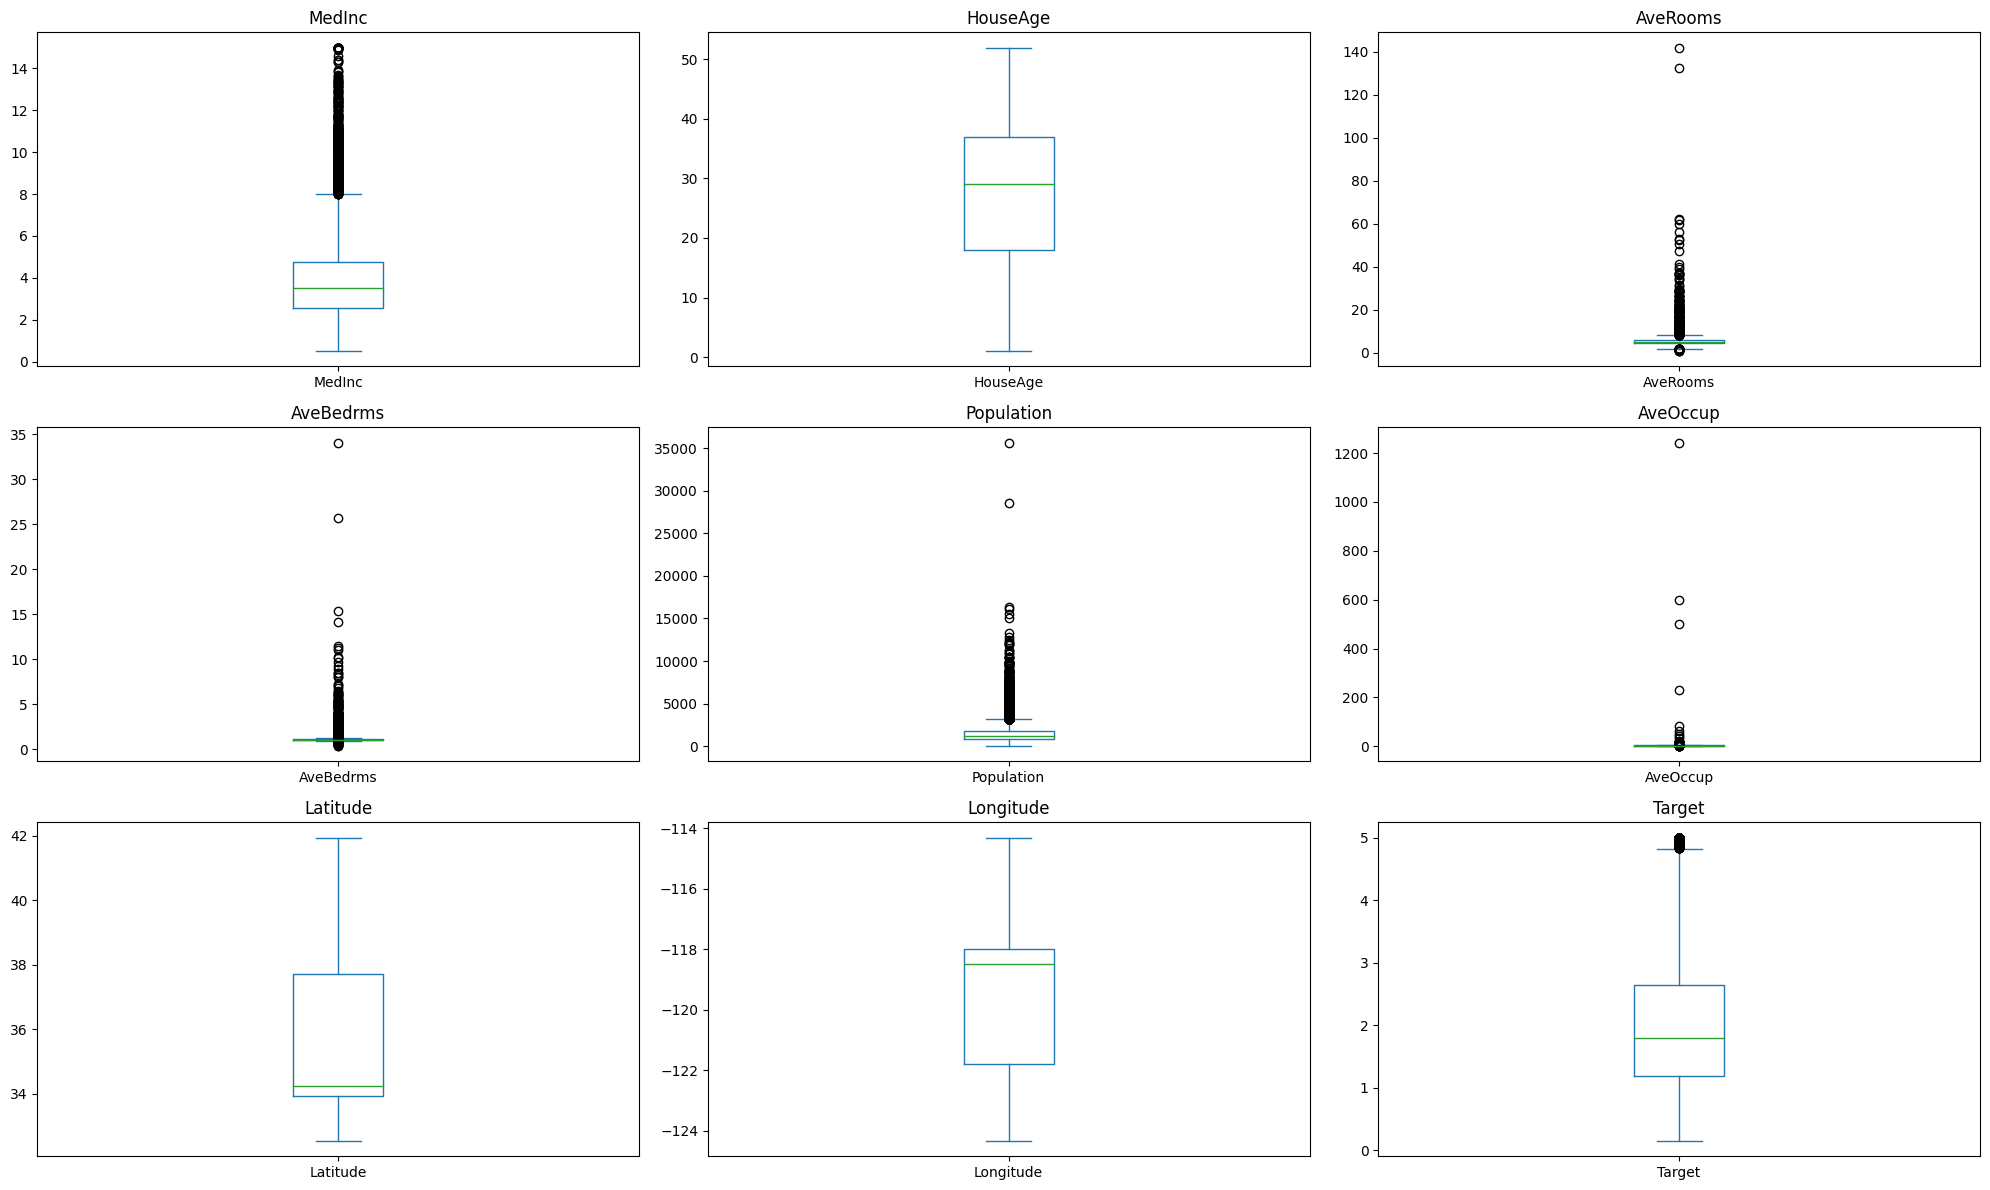

In [ ]:
# 2) 이상치 확인
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3, figsize=(20,12))

for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3

    df[column].plot(kind='box', ax=ax[row,col])
    ax[row,col].set_title(column)
plt.tight_layout()
plt.show()

In [2]:
# 2) 이상치 제거

# 이상치가 많지만 예측에 필요한 정보들이라고 생각이들어 target만 이상치 제거
Q1 = df['Target'].quantile(0.25)
Q3 = df['Target'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Target'] < lower_bound) | (df['Target'] > upper_bound)]

print(len(outliers))
outliers[:5]

1071


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001


In [3]:
data = df[(df['Target'] >= lower_bound) & (df['Target'] <= upper_bound)]
data = data.reset_index(drop=True)

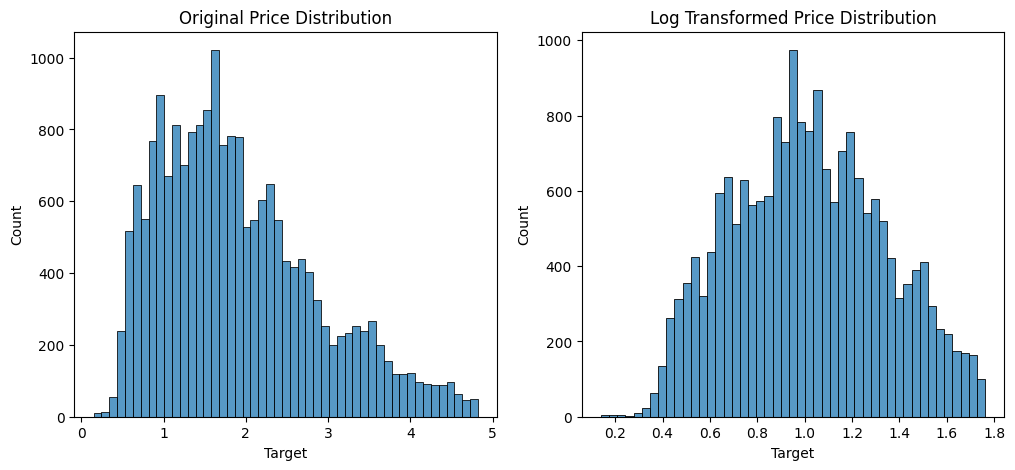

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1행 2열의 서브플롯 생성
fig, axs = plt.subplots(figsize=(12, 5), ncols=2, nrows=1)

# 원래 PRICE의 분포
sns.histplot(data['Target'], ax=axs[0])
axs[0].set_title('Original Price Distribution')

# 로그 변환된 PRICE의 분포
y_log = np.log1p(data['Target'])
sns.histplot(y_log, ax=axs[1])
axs[1].set_title('Log Transformed Price Distribution')

# 그래프 표시
plt.show()

In [4]:
df1 = data.copy()

<Axes: >

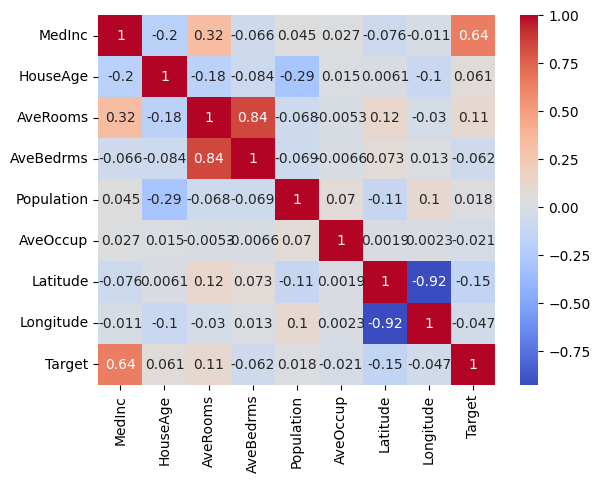

In [ ]:
# 3) 상관계수 확인
import seaborn as sns

sns.heatmap(df1.corr(),annot=True, cmap='coolwarm')

In [5]:
from numpy.linalg import svd
from sklearn.decomposition import TruncatedSVD
# 축소할 열 선택
# AveRooms, AveBedrms
# Longitude, Latitude
df_ave_roombed = df1.iloc[:,2:4]
df_Lat_Lon = df1.iloc[:,-2:-4:-1]
# print(df_ave_roombed)
# print(df_Lat_Lon)
svd = TruncatedSVD(n_components=1)


# SVD 적용
X_red= svd.fit_transform(df_ave_roombed)
X_red1 = svd.fit_transform(df_Lat_Lon)


df_1 = pd.DataFrame(X_red, columns=['Ave_roombed'])
df_2 = pd.DataFrame(X_red1, columns=['LongLat'])



In [6]:
# 기존 데이터프레임에서 삭제
df1.drop(['AveRooms','AveBedrms','Longitude','Latitude'], axis=1, inplace=True)

In [7]:
# 축소한 df와 결합
df_result = pd.concat([df1,df_1,df_2],axis=1)

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_result.drop('Target',axis=1)
y = df_result.Target

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search

# Define reduced parameter grids
param_grids = {
    'LinearRegression': {},
    'Ridge': {
        'alpha': [0.1, 1, 10],
        'fit_intercept': [True, False]
    },
    'Lasso': {
        'alpha': [0.1, 1, 10],
        'fit_intercept': [True, False]
    },
    'ElasticNet': {
        'alpha': [0.1, 1, 10],
        'l1_ratio': [0.1, 0.5],
        'fit_intercept': [True, False]
    },
    'RandomForestRegressor': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    },
    'DecisionTreeRegressor': {
        'criterion': ['squared_error', 'absolute_error'],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
}

# Initialize models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor()
}


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

for name, model in models.items():
    param_grid = param_grids.get(name, {})
    grid_search = perform_grid_search(model, param_grid, X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    result = evaluate_model(best_model, X_test, y_test)

    print(f"Best {name} model parameters:", best_params)
    print("Evaluation results (MSE, MAE, R2):", result)
    print()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best LinearRegression model parameters: {}
Evaluation results (MSE, MAE, R2): (0.4768905684699981, 0.5297561217981037, 0.48434242587465837)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Ridge model parameters: {'alpha': 10, 'fit_intercept': True}
Evaluation results (MSE, MAE, R2): (0.47691226674580395, 0.5297950281962901, 0.48431896372001637)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Lasso model parameters: {'alpha': 0.1, 'fit_intercept': True}
Evaluation results (MSE, MAE, R2): (0.5171066804675735, 0.5601746093371468, 0.4408570979514088)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best ElasticNet model parameters: {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.1}
Evaluation results (MSE, MAE, R2): (0.48705503134066064, 0.5403096333119907, 0.47335168163958397)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best RandomForestRegressor model paramet

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search

# Define reduced parameter grids
param_grids = {
    'GradientBoostingRegressor': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'subsample': [0.8, 1.0]
    },
    'XGBRegressor': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_child_weight': [1, 3],
        'subsample': [0.8, 1.0]
    },
    'LGBMRegressor': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 63],
        'max_depth': [10, 20],
        'min_child_samples': [20, 30],
        'subsample': [0.8, 1.0]
    }
}

# Initialize models
models = {
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor(),
    'LGBMRegressor': LGBMRegressor(),
}

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

for name, model in models.items():
    param_grid = param_grids.get(name, {})
    grid_search = perform_grid_search(model, param_grid, X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    result = evaluate_model(best_model, X_test, y_test)

    print(f"Best {name} model parameters:", best_params)
    print("Evaluation results (MSE, MAE, R2):", result)
    print()

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best GradientBoostingRegressor model parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Evaluation results (MSE, MAE, R2): (0.2664323084637419, 0.3692296260356273, 0.7119090899788446)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best XGBRegressor model parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Evaluation results (MSE, MAE, R2): (0.26212177320475616, 0.36675613984741484, 0.7165700338133213)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 15655, number of used features: 6
[LightGBM] [Info] S

In [13]:
# MSE, MAE가 낮으면서 R2가 1에 가까운 모델은 LGBMRegressor
# {'learning_rate': 0.1, 'max_depth': 20, 'min_child_samples': 30, 'n_estimators': 100, 'num_leaves': 63, 'subsample': 0.8}
# 성능이 가장 좋았던 파라미터를 사용하여 결과 출력

from lightgbm import LGBMRegressor


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE : {mse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f'R2 : {r2:.2f}')


model = LGBMRegressor(learning_rate= 0.1, max_depth= 20, min_child_samples= 30,
                      n_estimators= 100, num_leaves= 63, subsample= 0.8)


model.fit(X_train, y_train)

print('가장 최적의 파라미터를 사용한 LGBMRegressor')
evaluate_model(model,X_test,y_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 15655, number of used features: 6
[LightGBM] [Info] Start training from score 1.909659
가장 최적의 파라미터를 사용한 LGBMRegressor
MSE : 0.25
MAE : 0.35
R2 : 0.73
